In [1]:
import numpy as np  # Library for Arrays
import pandas as pd  # Library for DataFrame
import matplotlib.pyplot as plt  # Library for Plotting
import nltk  
from nltk import word_tokenize, sent_tokenize  # Tokenization of Sentences and Words 
from nltk.corpus import stopwords  # To Remove Stopwords
from sklearn.feature_extraction.text import CountVectorizer   # Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer   # Term Freq. and Inverse Document Freq.
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer  # Stemming Process
from textblob import TextBlob  # Sentiment Analysis TextBlob Library
from sklearn.model_selection import train_test_split   # For training and spliting (80%-20%)
from sklearn.naive_bayes import MultinomialNB    # Naive Byes ML Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   # Analysis

In [2]:
# Reading file and converting it to DataFrame
hotel_reviews = pd.DataFrame(pd.read_csv("7282_1.csv"))

In [3]:
hotel_reviews

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
35908,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
35909,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC
35910,3747 29th St S E,"Hotels-Apartment,Corporate Lodging,Hotels,Lodging",Grand Rapids,US,42.909480,-85.573590,Extended Stay America Grand Rapids - Kentwood,49512,MI,NaN,2015-12-01T19:40:54Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,NaN,NaN,write a review,NaN


In [4]:
hotel_reviews.shape

(35912, 19)

In [5]:
hotel_reviews.info

<bound method DataFrame.info of                       address  \
0      Riviera San Nicol 11/a   
1      Riviera San Nicol 11/a   
2      Riviera San Nicol 11/a   
3      Riviera San Nicol 11/a   
4      Riviera San Nicol 11/a   
...                       ...   
35907      1088 Powdermill Rd   
35908      1088 Powdermill Rd   
35909      1088 Powdermill Rd   
35910        3747 29th St S E   
35911        3747 29th St S E   

                                              categories          city  \
0                                                 Hotels      Mableton   
1                                                 Hotels      Mableton   
2                                                 Hotels      Mableton   
3                                                 Hotels      Mableton   
4                                                 Hotels      Mableton   
...                                                  ...           ...   
35907  Cabins,Resorts & Vacation Cottages,Wedding Cha

In [6]:
hotel_reviews.describe

<bound method NDFrame.describe of                       address  \
0      Riviera San Nicol 11/a   
1      Riviera San Nicol 11/a   
2      Riviera San Nicol 11/a   
3      Riviera San Nicol 11/a   
4      Riviera San Nicol 11/a   
...                       ...   
35907      1088 Powdermill Rd   
35908      1088 Powdermill Rd   
35909      1088 Powdermill Rd   
35910        3747 29th St S E   
35911        3747 29th St S E   

                                              categories          city  \
0                                                 Hotels      Mableton   
1                                                 Hotels      Mableton   
2                                                 Hotels      Mableton   
3                                                 Hotels      Mableton   
4                                                 Hotels      Mableton   
...                                                  ...           ...   
35907  Cabins,Resorts & Vacation Cottages,Wedding C

In [7]:
hotel_reviews.columns

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince'],
      dtype='object')

In [8]:
hotel_reviews.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [9]:
columns = ['address', 'categories', 'city', 'country', 'latitude', 'longitude',
           'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
           'reviews.doRecommend', 'reviews.id', 'reviews.title', 'reviews.userCity',
           'reviews.username', 'reviews.userProvince']

In [10]:
# Removing the extra columns present in the DataFrame
hotel_reviews = pd.DataFrame(hotel_reviews.drop(columns, axis=1, inplace=False))

In [11]:
hotel_reviews

,reviews.rating,reviews.text
0,4.0,Pleasant 10 min walk along the sea front to th...
1,5.0,Really lovely hotel. Stayed on the very top fl...
2,5.0,Ett mycket bra hotell. Det som drog ner betyge...
3,5.0,We stayed here for four nights in October. The...
4,5.0,We stayed here for four nights in October. The...
...,...,...
35907,5.0,Best of the Best!!!! My family and I stayed in...
35908,5.0,Amazing Vacation in Beautiful Cabin We stayed ...
35909,5.0,My husband and I stayed at Tree Tops which is ...
35910,0.0,to share your opinion of this businesswith YP ...


In [12]:
hotel_reviews.shape

(35912, 2)

In [13]:
hotel_reviews['reviews.rating'].value_counts()

5.0     12671
4.0      9755
3.0      5708
1.0      3068
2.0      2979
0.0       337
10.0      101
9.6        53
9.2        49
4.3        26
4.8        25
8.3        25
7.9        24
7.5        24
8.8        24
4.2        22
3.4        17
4.1        14
6.3        14
7.1        13
4.5        13
6.7        12
5.4         9
4.6         7
3.1         7
5.8         6
4.4         6
3.3         6
4.7         6
4.9         6
2.4         4
2.5         3
3.8         3
3.7         2
3.2         2
3.9         2
2.8         1
1.3         1
9.5         1
1.5         1
6.0         1
2.9         1
7.0         1
Name: reviews.rating, dtype: int64

<AxesSubplot:>

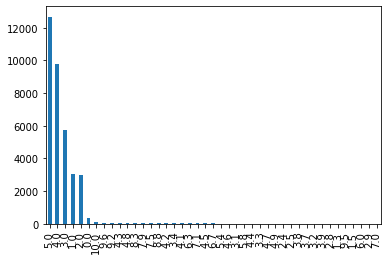

In [14]:
# Plotting Graph of 'reviews.rating'
hotel_reviews['reviews.rating'].value_counts().plot(kind='bar')

In [15]:
hotel_reviews['reviews.text'] = hotel_reviews['reviews.text'].astype(str)

In [16]:
hotel_reviews['reviews.text'][5]

'We loved staying on the island of Lido! You need to take a water is from Venice to get there. From the train station, a boat ride takes 45 minutes but has beautiful views along the way. Hotel is an EASY walk from the boat dock. The room was very clean and the breakfast was plentiful. We would definitely recommend this hotel!'

In [17]:
# Function to convert uppercase letters into lowercase letters 
def toLower(text):
    return text.lower()

In [18]:
# Applying toLower function to 'reviews.text' column
hotel_reviews['reviews.text'] = hotel_reviews['reviews.text'].apply(toLower)

In [19]:
hotel_reviews['reviews.text'][5]

'we loved staying on the island of lido! you need to take a water is from venice to get there. from the train station, a boat ride takes 45 minutes but has beautiful views along the way. hotel is an easy walk from the boat dock. the room was very clean and the breakfast was plentiful. we would definitely recommend this hotel!'

In [20]:
# Function to remove special characters
def isSpecial(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

In [21]:
hotel_reviews['reviews.text'] = hotel_reviews['reviews.text'].apply(isSpecial)

In [22]:
hotel_reviews['reviews.text'][5]

'we loved staying on the island of lido  you need to take a water is from venice to get there  from the train station  a boat ride takes 45 minutes but has beautiful views along the way  hotel is an easy walk from the boat dock  the room was very clean and the breakfast was plentiful  we would definitely recommend this hotel '

In [23]:
# Function to remove stopwords
def removeStopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

In [24]:
hotel_reviews['reviews.text'] = hotel_reviews['reviews.text'].apply(removeStopwords)

In [25]:
hotel_reviews['reviews.text'][5]

['loved',
 'staying',
 'island',
 'lido',
 'need',
 'take',
 'water',
 'venice',
 'get',
 'train',
 'station',
 'boat',
 'ride',
 'takes',
 '45',
 'minutes',
 'beautiful',
 'views',
 'along',
 'way',
 'hotel',
 'easy',
 'walk',
 'boat',
 'dock',
 'room',
 'clean',
 'breakfast',
 'plentiful',
 'would',
 'definitely',
 'recommend',
 'hotel']

In [26]:
# Apply Lemmatization
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text])

In [27]:
hotel_reviews['reviews.text'] = hotel_reviews['reviews.text'].apply(lemmatization)

In [28]:
hotel_reviews['reviews.text'][5]

'loved staying island lido need take water venice get train station boat ride take 45 minute beautiful view along way hotel easy walk boat dock room clean breakfast plentiful would definitely recommend hotel'

In [29]:
# Function to calculate score for the entire dataset
def sentimentScore(text):
    return TextBlob(text).sentiment

In [30]:
hotel_reviews['sentiment.score'] = hotel_reviews['reviews.text'].apply(sentimentScore)

In [31]:
hotel_reviews['sentiment.score'].head()

0     (0.611111111111111, 0.7888888888888889)
1    (0.5535714285714286, 0.7000000000000001)
2                                (0.35, 0.55)
3                 (0.3177083333333333, 0.625)
4                 (0.3177083333333333, 0.625)
Name: sentiment.score, dtype: object

In [32]:
# Function to calculate Sentiments 
def sentiment(senti):
    if senti.polarity < 0:
        return "Negative"
    elif senti.polarity > 0:
        return "Positive"
    else:
        return "Neutral"

In [33]:
hotel_reviews['sentiment'] = hotel_reviews['sentiment.score'].apply(sentiment)

In [34]:
hotel_reviews['sentiment']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
35907    Positive
35908    Positive
35909    Positive
35910     Neutral
35911     Neutral
Name: sentiment, Length: 35912, dtype: object

In [35]:
hotel_reviews

,reviews.rating,reviews.text,sentiment.score,sentiment
0,4.0,pleasant 10 min walk along sea front water bus...,"(0.611111111111111, 0.7888888888888889)",Positive
1,5.0,really lovely hotel stayed top floor surprised...,"(0.5535714285714286, 0.7000000000000001)",Positive
2,5.0,ett mycket bra hotell det som drog ner betyget...,"(0.35, 0.55)",Positive
3,5.0,stayed four night october hotel staff welcomin...,"(0.3177083333333333, 0.625)",Positive
4,5.0,stayed four night october hotel staff welcomin...,"(0.3177083333333333, 0.625)",Positive
...,...,...,...,...
35907,5.0,best best family stayed grin bear cabin christ...,"(0.6749999999999999, 0.4875)",Positive
35908,5.0,amazing vacation beautiful cabin stayed long w...,"(0.3, 0.545)",Positive
35909,5.0,husband stayed tree top bearfoot resort manage...,"(0.2239484126984127, 0.5442857142857143)",Positive
35910,0.0,share opinion businesswith yp visitor across u...,"(0.0, 0.0)",Neutral


In [36]:
X_hotel_reviews = np.array(hotel_reviews.iloc[:,1].values)
cv = CountVectorizer(max_features = 1000) # Bag of words count vectorizer
X_hotel_reviews = cv.fit_transform(hotel_reviews['reviews.text']).toarray()
Y_sentiments = np.array(hotel_reviews['sentiment'].values)

In [37]:
X_hotel_reviews

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
Y_sentiments

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Neutral',
       'Neutral'], dtype=object)

In [39]:
# Train Test And Split
hotel_reviews_train,hotel_reviews_test,sentiments_train,sentiments_test = train_test_split(X_hotel_reviews, Y_sentiments, test_size=0.3,random_state=9)

In [40]:
hotel_reviews_train.shape

(25138, 1000)

In [41]:
hotel_reviews_test.shape

(10774, 1000)

In [42]:
sentiments_train.shape

(25138,)

In [43]:
sentiments_test.shape

(10774,)

In [44]:
# Defining the models and Training
mnb = MultinomialNB(alpha=1.0,fit_prior=True)
mnb.fit(hotel_reviews_train,sentiments_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
# Prediction and accuracy metrics of Model
sentiments_predicted=mnb.predict(hotel_reviews_test)

In [46]:
print("Accuracy of Model Using Text Blob, Count Vectorizer And Lemmatization = ",accuracy_score(sentiments_test,sentiments_predicted))

Accuracy of Model Using Text Blob, Count Vectorizer And Lemmatization =  0.8320957861518471


In [47]:
# Classification Report of Model Using Text Blob, Count Vectorizer And Lemmatization  
print(classification_report(sentiments_test,sentiments_predicted))

              precision    recall  f1-score   support

    Negative       0.52      0.71      0.60      1333
     Neutral       0.81      0.36      0.49       923
    Positive       0.90      0.90      0.90      8518

    accuracy                           0.83     10774
   macro avg       0.74      0.66      0.67     10774
weighted avg       0.84      0.83      0.83     10774



In [48]:
# Confusion Matrix of Model Using Text Blob, Count Vectorizer And Lemmatization
print(confusion_matrix(sentiments_test,sentiments_predicted))

[[ 942   20  371]
 [ 101  329  493]
 [ 766   58 7694]]


In [49]:
# Term Frequency and Inverse Document Frequency Creation
tfidf = TfidfVectorizer()
X_hotel_reviews = tfidf.fit_transform(hotel_reviews['reviews.text']).toarray()

In [50]:
# Term Frequency and Inverse Document Frequency Creation Array 
X_hotel_reviews

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# Train Test And Split On TF and IDF
hotel_reviews_train, hotel_reviews_test, sentiments_train, sentiments_test = train_test_split(X_hotel_reviews, Y_sentiments, test_size=0.2,random_state=9)

In [52]:
hotel_reviews_train.shape

(28729, 29637)

In [53]:
hotel_reviews_test.shape

(7183, 29637)

In [54]:
sentiments_train.shape

(28729,)

In [55]:
sentiments_test.shape

(7183,)

In [56]:
# Defining the models and Training
mnb = MultinomialNB(alpha=1.0,fit_prior=True)
mnb.fit(hotel_reviews_train,sentiments_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
# Prediction and accuracy metrics of Model
sentiments_predicted=mnb.predict(hotel_reviews_test)

In [58]:
print("Accuracy of Model Using Text Blob, TF, IDF Vectorizer And Lemmatization  = ",accuracy_score(sentiments_test,sentiments_predicted))

Accuracy of Model Using Text Blob, TF, IDF Vectorizer And Lemmatization  =  0.829736878741473


In [59]:
# Classification Report of Model Using Text Blob, TF, IDF Vectorizer And Lemmatization  
print(classification_report(sentiments_test,sentiments_predicted))

              precision    recall  f1-score   support

    Negative       0.96      0.03      0.06       878
     Neutral       0.85      0.47      0.60       618
    Positive       0.83      0.99      0.90      5687

    accuracy                           0.83      7183
   macro avg       0.88      0.50      0.52      7183
weighted avg       0.85      0.83      0.77      7183



In [60]:
# Confusion Matrix of Model Using Text Blob, TF, IDF Vectorizer And Lemmatization
print(confusion_matrix(sentiments_test,sentiments_predicted))

[[  25   12  841]
 [   1  288  329]
 [   0   40 5647]]
